In [1]:
import pandas as pd

# Cargar archivo CSV
df_csv = pd.read_csv('Datos/Ruido_diario_acumulado.csv', encoding='ISO-8859-1', sep=';')

# Mostrar las primeras filas
print(df_csv.head())

# Cargar archivo Excel
df_excel = pd.read_excel('Datos/EstacionesMedidaControlAcustico.xls')


# Quitar el prefijo 'RF ' en la columna 'NMT' del DataFrame Excel
df_excel['NMT'] = df_excel['NMT'].str.replace('RF ', '').astype(str)

# Asegurarse de que ambas columnas 'NMT' sean del mismo tipo (str)
df_csv['NMT'] = df_csv['NMT'].astype(str)

# Unir los DataFrames por la columna 'NMT'
df_merged = pd.merge(df_csv, df_excel, on='NMT')

# Mostrar las primeras filas del DataFrame resultante
print(df_merged.head())

   NMT   Año  mes  dia tipo  LAeq    L1   L10   L50   L90   L99
0    3  2014    1    1    D  57,4  66,6  61,1  54,3  49,1    45
1    3  2014    1    1    E  58,7  66,6    62    56  52,1  48,5
2    3  2014    1    1    N  65,9  72,5  66,1  60,9  56,2  52,1
3    3  2014    1    1    T  62,2  69,3  63,8  56,5  50,3  45,8
4    4  2014    1    1    D  67,3  72,4    67  63,2  59,5  56,2
  NMT   Año  mes  dia tipo  LAeq    L1   L10   L50   L90   L99  \
0   3  2014    1    1    D  57,4  66,6  61,1  54,3  49,1    45   
1   3  2014    1    1    E  58,7  66,6    62    56  52,1  48,5   
2   3  2014    1    1    N  65,9  72,5  66,1  60,9  56,2  52,1   
3   3  2014    1    1    T  62,2  69,3  63,8  56,5  50,3  45,8   
4   3  2014    1    2    D  62,1  69,6  64,9  59,5    55  50,3   

             NOMBRE                                          DIRECCION  \
0  Plaza del Carmen  Plaza del Carmen frente al Nº 3 de la Calle de...   
1  Plaza del Carmen  Plaza del Carmen frente al Nº 3 de la Calle de... 

In [2]:
# Eliminar columnas especificadas del DataFrame resultante
df_cleaned = df_merged.drop(columns=['NOMBRE', 'DIRECCION', 'X (ETRS89)', 'Y (ETRS89)', 'FECHA ALTA', 'NMT'])
# Eliminar las filas donde el tipo es 'T' (Total)
df_cleaned = df_cleaned[~df_cleaned['tipo'].isin(['T', 'E'])]

# Verificar que el periodo total haya sido eliminado
print(df_cleaned['tipo'].unique())  # Debería mostrar solo 'D', 'E', 'N'

# Mostrar las primeras filas del DataFrame después de eliminar las columnas
print(df_cleaned.head())


['D' 'N']
    Año  mes  dia tipo  LAeq    L1   L10   L50   L90   L99  LONGITUD  \
0  2014    1    1    D  57,4  66,6  61,1  54,3  49,1    45 -3.703175   
2  2014    1    1    N  65,9  72,5  66,1  60,9  56,2  52,1 -3.703175   
4  2014    1    2    D  62,1  69,6  64,9  59,5    55  50,3 -3.703175   
6  2014    1    2    N  61,8    69  60,8  53,3  48,5  45,3 -3.703175   
8  2014    1    3    D    62  70,3  64,9  59,6  54,4  49,6 -3.703175   

     LATITUD  ALTITUD  
0  40.419251      657  
2  40.419251      657  
4  40.419251      657  
6  40.419251      657  
8  40.419251      657  


In [3]:
# Contar los datos por cada combinación de LATITUD y LONGITUD
count_per_station = df_cleaned.groupby(['LATITUD', 'LONGITUD']).size().reset_index(name='count')

# Mostrar los resultados
print(count_per_station)


      LATITUD  LONGITUD  count
0   40.347100 -3.713312   7562
1   40.372993 -3.612100   7420
2   40.375250 -3.777830   7588
3   40.379072 -3.602561   6752
4   40.384978 -3.718807   7449
5   40.388116 -3.651506   7579
6   40.394788 -3.731786   7550
7   40.398022 -3.686808   7516
8   40.407871 -3.741950   7381
9   40.408028 -3.645215   7505
10  40.409121 -3.691509   6784
11  40.419251 -3.703175   7285
12  40.419390 -3.747319   7524
13  40.421575 -3.682377   7475
14  40.422599 -3.691877   6594
15  40.424005 -3.712253   5955
16  40.428741 -3.668584   7593
17  40.437548 -3.690758   6746
18  40.439854 -3.690302   7618
19  40.440013 -3.639284   7412
20  40.445581 -3.707157   7534
21  40.451522 -3.677359   7447
22  40.459331 -3.580128   6679
23  40.460761 -3.616317   7534
24  40.462298 -3.580599   7547
25  40.465628 -3.688719   6774
26  40.476929 -3.580101   7467
27  40.478197 -3.711543   7601
28  40.494254 -3.660454   7527
29  40.500598 -3.689643   7569
30  40.517989 -3.774551   7561


In [4]:
# Crear la columna 'time' combinando 'Año', 'mes' y 'dia'
df_cleaned['time'] = pd.to_datetime(df_cleaned[['Año', 'mes', 'dia']].rename(columns={'Año': 'year', 'mes': 'month', 'dia': 'day'}))

In [5]:
import pandas as pd
import numpy as np

# Supongamos que ya tienes cargado tu DataFrame original
# df_cleaned = pd.read_csv("datos_sonido.csv")

# Definir las columnas únicas de tiempo, tipo y las coordenadas existentes (sin Año, mes, dia)
tiempos_unicos = df_cleaned['time'].unique()
coordenadas_unicas = df_cleaned[['LONGITUD', 'LATITUD', 'ALTITUD', 'tipo']].drop_duplicates()

# Crear todas las combinaciones posibles de tiempo y tipo
combinaciones_tiempo = pd.DataFrame({'time': tiempos_unicos})

# Usar merge para crear todas las combinaciones posibles de coordenadas con tiempo
df_completo = coordenadas_unicas.merge(
    combinaciones_tiempo,
    how='cross'
)

# Hacer un merge con los datos originales para mantener las variables acústicas donde existan
df_complete = pd.merge(
    df_completo, df_cleaned,
    on=['time', 'tipo', 'LONGITUD', 'LATITUD', 'ALTITUD'],
    how='left'
)

# Rellenar las variables acústicas que faltan con NaN (esto es redundante porque `merge` ya pone NaN por defecto)
variables_acusticas = ['LAeq', 'L1', 'L10', 'L50', 'L90', 'L99']
df_complete[variables_acusticas] = df_complete[variables_acusticas].where(df_complete[variables_acusticas].notna(), np.nan)

# Mostrar el DataFrame resultante
print(df_complete)


        LONGITUD    LATITUD  ALTITUD tipo       time     Año  mes   dia  LAeq  \
0      -3.703175  40.419251      657    D 2014-01-01  2014.0  1.0   1.0  57,4   
1      -3.703175  40.419251      657    D 2014-01-02  2014.0  1.0   2.0  62,1   
2      -3.703175  40.419251      657    D 2014-01-03  2014.0  1.0   3.0    62   
3      -3.703175  40.419251      657    D 2014-01-04  2014.0  1.0   4.0  61,7   
4      -3.703175  40.419251      657    D 2014-01-05  2014.0  1.0   5.0  59,9   
...          ...        ...      ...  ...        ...     ...  ...   ...   ...   
240927 -3.690758  40.437548      669    N 2021-07-21  2021.0  7.0  21.0  63,8   
240928 -3.690758  40.437548      669    N 2023-01-17  2023.0  1.0  17.0  64,6   
240929 -3.690758  40.437548      669    N 2023-01-18  2023.0  1.0  18.0  63,8   
240930 -3.690758  40.437548      669    N 2023-01-19  2023.0  1.0  19.0  64,4   
240931 -3.690758  40.437548      669    N 2024-01-16  2024.0  1.0  16.0  64,9   

          L1   L10   L50   

In [6]:
# Contar los datos por cada combinación de LATITUD y LONGITUD
count_per_station = df_complete.groupby(['LATITUD', 'LONGITUD']).size().reset_index(name='count')

# Mostrar los resultados
print(count_per_station)


      LATITUD  LONGITUD  count
0   40.347100 -3.713312   7772
1   40.372993 -3.612100   7772
2   40.375250 -3.777830   7772
3   40.379072 -3.602561   7772
4   40.384978 -3.718807   7772
5   40.388116 -3.651506   7772
6   40.394788 -3.731786   7772
7   40.398022 -3.686808   7772
8   40.407871 -3.741950   7772
9   40.408028 -3.645215   7772
10  40.409121 -3.691509   7772
11  40.419251 -3.703175   7772
12  40.419390 -3.747319   7772
13  40.421575 -3.682377   7772
14  40.422599 -3.691877   7772
15  40.424005 -3.712253   7772
16  40.428741 -3.668584   7772
17  40.437548 -3.690758   7772
18  40.439854 -3.690302   7772
19  40.440013 -3.639284   7772
20  40.445581 -3.707157   7772
21  40.451522 -3.677359   7772
22  40.459331 -3.580128   7772
23  40.460761 -3.616317   7772
24  40.462298 -3.580599   7772
25  40.465628 -3.688719   7772
26  40.476929 -3.580101   7772
27  40.478197 -3.711543   7772
28  40.494254 -3.660454   7772
29  40.500598 -3.689643   7772
30  40.517989 -3.774551   7772


In [7]:
import pandas as pd

# Paso 1: Obtener coordenadas únicas y tiempos únicos
coords = df_complete[['LATITUD', 'LONGITUD']].drop_duplicates()
times = df_complete['time'].unique()

# Paso 2: Crear todas las combinaciones posibles de coordenadas y tiempos
coords['key'] = 1
times_df = pd.DataFrame({'time': times})
times_df['key'] = 1
full_df = coords.merge(times_df, on='key').drop('key', axis=1)

# Paso 3: Fusionar con df_complete para identificar registros faltantes
df_full = full_df.merge(df_complete, on=['LATITUD', 'LONGITUD', 'time'], how='left', indicator=True)

# Paso 4: Identificar registros faltantes
missing_entries = df_full[df_full['_merge'] == 'left_only']
num_missing = len(missing_entries)
print(f"Hay {num_missing} combinaciones de coordenadas y time sin datos en df_complete.")

# Paso 5: Analizar los resultados
if num_missing == 0:
    print("Todas las coordenadas tienen datos para todos los tiempos.")
else:
    print("Las siguientes combinaciones de coordenadas y tiempos no tienen datos:")
    print(missing_entries[['LATITUD', 'LONGITUD', 'time']])


Hay 0 combinaciones de coordenadas y time sin datos en df_complete.
Todas las coordenadas tienen datos para todos los tiempos.


In [8]:
# Contar los valores nulos por columna
print(df_complete.isnull().sum())


LONGITUD        0
LATITUD         0
ALTITUD         0
tipo            0
time            0
Año         14404
mes         14404
dia         14404
LAeq        14404
L1          14404
L10         14404
L50         14404
L90         14404
L99         14404
dtype: int64


In [9]:
# Contar los datos por cada combinación de LATITUD y LONGITUD
count_per_station = df_complete.groupby(['LATITUD', 'LONGITUD']).size().reset_index(name='count')

# Mostrar los resultados
print(count_per_station)

      LATITUD  LONGITUD  count
0   40.347100 -3.713312   7772
1   40.372993 -3.612100   7772
2   40.375250 -3.777830   7772
3   40.379072 -3.602561   7772
4   40.384978 -3.718807   7772
5   40.388116 -3.651506   7772
6   40.394788 -3.731786   7772
7   40.398022 -3.686808   7772
8   40.407871 -3.741950   7772
9   40.408028 -3.645215   7772
10  40.409121 -3.691509   7772
11  40.419251 -3.703175   7772
12  40.419390 -3.747319   7772
13  40.421575 -3.682377   7772
14  40.422599 -3.691877   7772
15  40.424005 -3.712253   7772
16  40.428741 -3.668584   7772
17  40.437548 -3.690758   7772
18  40.439854 -3.690302   7772
19  40.440013 -3.639284   7772
20  40.445581 -3.707157   7772
21  40.451522 -3.677359   7772
22  40.459331 -3.580128   7772
23  40.460761 -3.616317   7772
24  40.462298 -3.580599   7772
25  40.465628 -3.688719   7772
26  40.476929 -3.580101   7772
27  40.478197 -3.711543   7772
28  40.494254 -3.660454   7772
29  40.500598 -3.689643   7772
30  40.517989 -3.774551   7772


In [10]:
# Contar los valores nulos por columna
print(df_complete.isnull().sum())

LONGITUD        0
LATITUD         0
ALTITUD         0
tipo            0
time            0
Año         14404
mes         14404
dia         14404
LAeq        14404
L1          14404
L10         14404
L50         14404
L90         14404
L99         14404
dtype: int64


In [11]:
import pandas as pd

# Realizar one-hot encoding en la columna 'tipo'
df_onehot = pd.get_dummies(df_complete, columns=['tipo'], prefix='periodo')

# Convertir las columnas 'periodo_D' y 'periodo_N' de booleano a enteros (0 y 1)
df_onehot[['periodo_D', 'periodo_N']] = df_onehot[['periodo_D', 'periodo_N']].astype(int)

# Mostrar las primeras filas del DataFrame resultante
print(df_onehot.head())


   LONGITUD    LATITUD  ALTITUD       time     Año  mes  dia  LAeq    L1  \
0 -3.703175  40.419251      657 2014-01-01  2014.0  1.0  1.0  57,4  66,6   
1 -3.703175  40.419251      657 2014-01-02  2014.0  1.0  2.0  62,1  69,6   
2 -3.703175  40.419251      657 2014-01-03  2014.0  1.0  3.0    62  70,3   
3 -3.703175  40.419251      657 2014-01-04  2014.0  1.0  4.0  61,7  69,2   
4 -3.703175  40.419251      657 2014-01-05  2014.0  1.0  5.0  59,9  67,6   

    L10   L50   L90   L99  periodo_D  periodo_N  
0  61,1  54,3  49,1    45          1          0  
1  64,9  59,5    55  50,3          1          0  
2  64,9  59,6  54,4  49,6          1          0  
3  64,9  59,8  54,8  50,4          1          0  
4    63  57,9  52,6  47,7          1          0  


In [12]:
import pandas as pd

# Convertir las columnas de objeto a números (si hay valores no numéricos, se convertirán en NaN)
columns_to_convert = ['LAeq', 'L1', 'L10', 'L50', 'L90', 'L99']

# Reemplazar comas por puntos en las columnas seleccionadas
df_onehot[columns_to_convert] = df_onehot[columns_to_convert].replace(',', '.', regex=True)

# Convertir cada columna a tipo numérico después de reemplazar comas
df_onehot[columns_to_convert] = df_onehot[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Verificar los tipos de datos después de la conversión
print(df_onehot.dtypes)

# Verificar si hay NaN después de la conversión
print(df_onehot[columns_to_convert].isna().sum())

# Mostrar algunos datos para verificar la conversión
print(df_onehot[columns_to_convert].head())


LONGITUD            float64
LATITUD             float64
ALTITUD               int64
time         datetime64[ns]
Año                 float64
mes                 float64
dia                 float64
LAeq                float64
L1                  float64
L10                 float64
L50                 float64
L90                 float64
L99                 float64
periodo_D             int32
periodo_N             int32
dtype: object
LAeq    14404
L1      14404
L10     14404
L50     14404
L90     14404
L99     14404
dtype: int64
   LAeq    L1   L10   L50   L90   L99
0  57.4  66.6  61.1  54.3  49.1  45.0
1  62.1  69.6  64.9  59.5  55.0  50.3
2  62.0  70.3  64.9  59.6  54.4  49.6
3  61.7  69.2  64.9  59.8  54.8  50.4
4  59.9  67.6  63.0  57.9  52.6  47.7


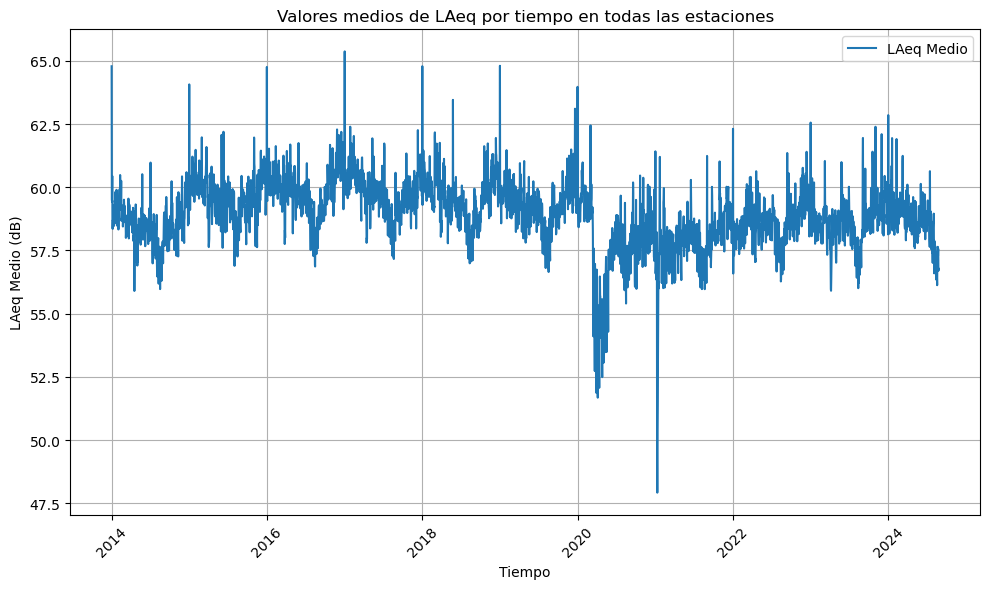

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas antes de agrupar
df_numeric = df_onehot.select_dtypes(include=['number'])

# Agrupar los datos por 'time' y calcular los valores medios para todas las estaciones (solo columnas numéricas)
df_avg = df_numeric.groupby(df_onehot['time']).mean()

# Graficar los valores medios de LAeq (o cualquier otra variable numérica que desees visualizar) a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_avg.index, df_avg['LAeq'], label='LAeq Medio')

# Añadir etiquetas y título
plt.xlabel('Tiempo')
plt.ylabel('LAeq Medio (dB)')
plt.title('Valores medios de LAeq por tiempo en todas las estaciones')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


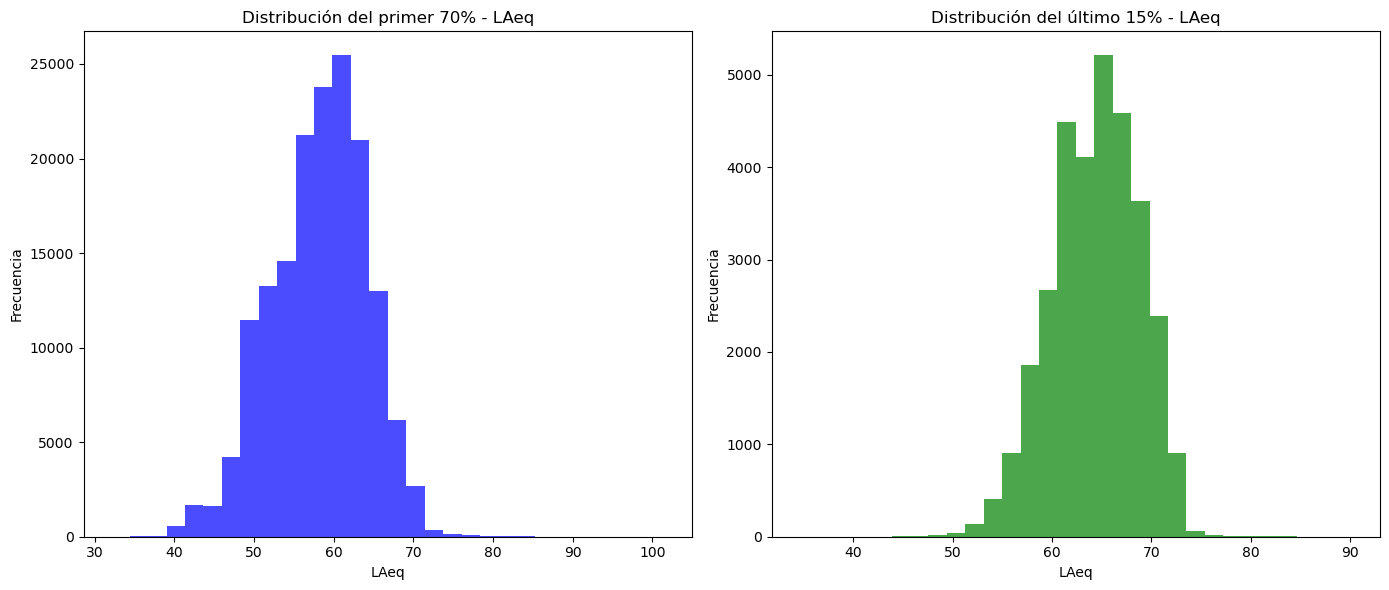

In [14]:
# Definir el tamaño del dataset
total_rows = len(df_onehot)

# Calcular índices para el primer 70% y el último 15%
first_70_percent = df_onehot.iloc[:int(0.70 * total_rows)]
last_15_percent = df_onehot.iloc[int(0.85 * total_rows):]

# Visualizar las distribuciones para una columna específica, ajusta la columna según tu interés
columna_interes = 'LAeq'  # Cambia esto según la columna que desees analizar

# Graficar las distribuciones
plt.figure(figsize=(14, 6))

# Primer 70%
plt.subplot(1, 2, 1)
plt.hist(first_70_percent[columna_interes], bins=30, alpha=0.7, color='blue')
plt.title(f'Distribución del primer 70% - {columna_interes}')
plt.xlabel(columna_interes)
plt.ylabel('Frecuencia')

# Último 15%
plt.subplot(1, 2, 2)
plt.hist(last_15_percent[columna_interes], bins=30, alpha=0.7, color='green')
plt.title(f'Distribución del último 15% - {columna_interes}')
plt.xlabel(columna_interes)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

# Asegúrate de que tienes una columna de tiempo en el DataFrame
df_onehot['time'] = pd.to_datetime(df_onehot['time'])

# Establecer 'time' como el índice
df_onehot.set_index('time', inplace=True)

# Definir las columnas de coordenadas para agrupar
coordenadas =  ['LONGITUD', 'LATITUD', 'ALTITUD', 'periodo_D', 'periodo_N']

# Seleccionar las columnas numéricas que queremos interpolar
columns_to_interpolate = ['LAeq', 'L1', 'L10', 'L50', 'L90', 'L99']

# Realizar la interpolación temporal agrupando por coordenadas
df_interpolated = df_onehot.groupby(coordenadas)[columns_to_interpolate].apply(
    lambda group: group.interpolate(method='time', limit_direction='both')
)

# Restablecer el índice para que 'time' vuelva a ser una columna en el DataFrame
df_interpolated = df_interpolated.reset_index()

# Verificar los primeros datos después de la interpolación
print(df_interpolated.head())


   LONGITUD   LATITUD  ALTITUD  periodo_D  periodo_N       time  LAeq    L1  \
0  -3.77783  40.37525      678          0          1 2014-01-01  68.9  75.8   
1  -3.77783  40.37525      678          0          1 2014-01-02  61.1  73.3   
2  -3.77783  40.37525      678          0          1 2014-01-03  61.1  72.6   
3  -3.77783  40.37525      678          0          1 2014-01-04  62.2  73.2   
4  -3.77783  40.37525      678          0          1 2014-01-05  61.0  71.9   

    L10   L50   L90   L99  
0  69.5  57.9  43.3  39.7  
1  64.4  50.3  43.4  41.0  
2  64.8  52.4  46.3  43.4  
3  66.4  54.7  47.1  43.3  
4  65.0  51.2  43.4  41.3  


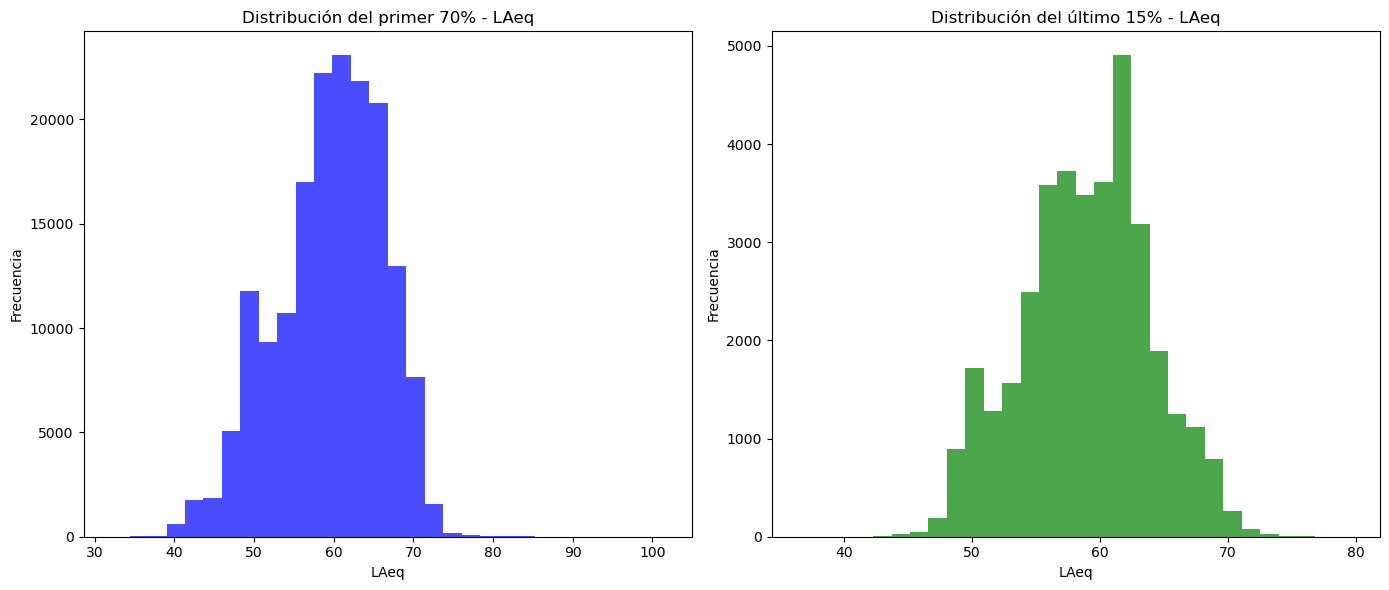

In [16]:
# Definir el tamaño del dataset
total_rows = len(df_interpolated)

# Calcular índices para el primer 70% y el último 15%
first_70_percent = df_interpolated.iloc[:int(0.70 * total_rows)]
last_15_percent = df_interpolated.iloc[int(0.85 * total_rows):]

# Visualizar las distribuciones para una columna específica, ajusta la columna según tu interés
columna_interes = 'LAeq'  # Cambia esto según la columna que desees analizar

# Graficar las distribuciones
plt.figure(figsize=(14, 6))

# Primer 70%
plt.subplot(1, 2, 1)
plt.hist(first_70_percent[columna_interes], bins=30, alpha=0.7, color='blue')
plt.title(f'Distribución del primer 70% - {columna_interes}')
plt.xlabel(columna_interes)
plt.ylabel('Frecuencia')

# Último 15%
plt.subplot(1, 2, 2)
plt.hist(last_15_percent[columna_interes], bins=30, alpha=0.7, color='green')
plt.title(f'Distribución del último 15% - {columna_interes}')
plt.xlabel(columna_interes)
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [17]:
df_interpolated

,LONGITUD,LATITUD,ALTITUD,periodo_D,periodo_N,time,LAeq,L1,L10,L50,L90,L99
0,-3.777830,40.375250,678,0,1,2014-01-01,68.9,75.8,69.5,57.9,43.3,39.7
1,-3.777830,40.375250,678,0,1,2014-01-02,61.1,73.3,64.4,50.3,43.4,41.0
2,-3.777830,40.375250,678,0,1,2014-01-03,61.1,72.6,64.8,52.4,46.3,43.4
3,-3.777830,40.375250,678,0,1,2014-01-04,62.2,73.2,66.4,54.7,47.1,43.3
4,-3.777830,40.375250,678,0,1,2014-01-05,61.0,71.9,65.0,51.2,43.4,41.3
...,...,...,...,...,...,...,...,...,...,...,...,...
240927,-3.580101,40.476929,627,1,0,2021-07-21,58.2,67.9,61.8,52.9,48.9,46.9
240928,-3.580101,40.476929,627,1,0,2023-01-17,62.8,71.7,66.7,59.1,55.2,53.0
240929,-3.580101,40.476929,627,1,0,2023-01-18,62.1,71.2,66.1,57.7,53.5,51.2
240930,-3.580101,40.476929,627,1,0,2023-01-19,62.2,72.0,66.3,56.1,51.9,49.8


In [18]:
# Contar los valores nulos por columna
print(df_interpolated.isnull().sum())


LONGITUD     0
LATITUD      0
ALTITUD      0
periodo_D    0
periodo_N    0
time         0
LAeq         0
L1           0
L10          0
L50          0
L90          0
L99          0
dtype: int64


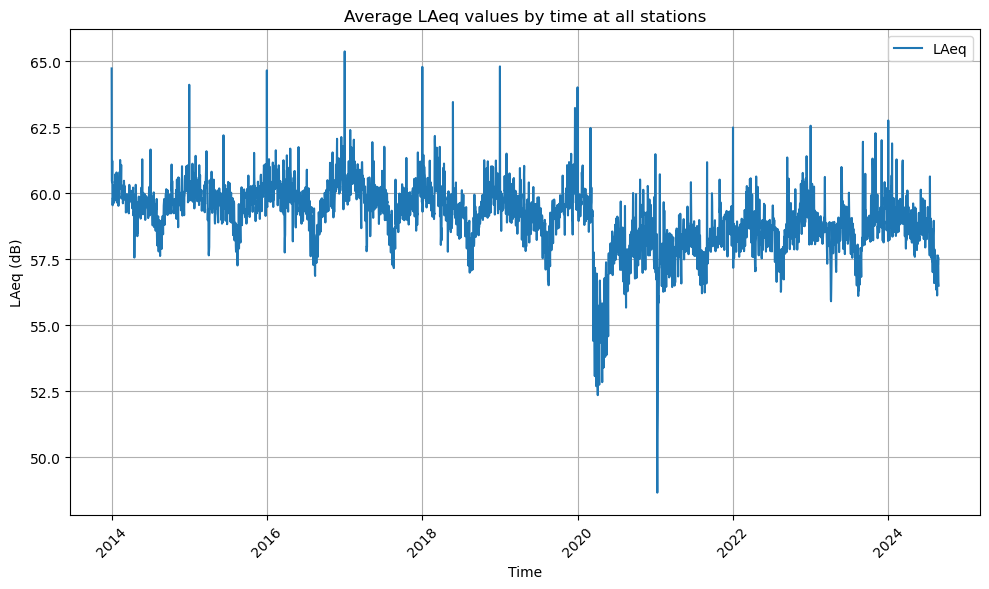

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
df_onehot = df_onehot.reset_index()# Seleccionar solo las columnas numéricas antes de agrupar
df_numeric = df_interpolated.select_dtypes(include=['number'])

# Agrupar los datos por 'time' y calcular los valores medios para todas las estaciones (solo columnas numéricas)
df_avg = df_numeric.groupby(df_interpolated['time']).mean()

# Graficar los valores medios de LAeq (o cualquier otra variable numérica que desees visualizar) a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(df_avg.index, df_avg['LAeq'], label='LAeq')

# Añadir etiquetas y título
plt.xlabel('Time')
plt.ylabel('LAeq (dB)')
plt.title('Average LAeq values by time at all stations')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd

# Asegurarnos de que la columna 'time' esté en formato de fecha
df_interpolated['time'] = pd.to_datetime(df_interpolated['time'])

# Crear una nueva columna 'adjusted_time' con las horas ajustadas
df_interpolated['time'] = df_interpolated.apply(lambda row: row['time'].replace(hour=12) if row['periodo_D'] == 1 else row['time'].replace(hour=0), axis=1)

# Mostrar las primeras filas para verificar los cambios
print(df_interpolated[['time',  'periodo_D', 'periodo_N']].head())


        time  periodo_D  periodo_N
0 2014-01-01          0          1
1 2014-01-02          0          1
2 2014-01-03          0          1
3 2014-01-04          0          1
4 2014-01-05          0          1


In [21]:
df_interpolated

,LONGITUD,LATITUD,ALTITUD,periodo_D,periodo_N,time,LAeq,L1,L10,L50,L90,L99
0,-3.777830,40.375250,678,0,1,2014-01-01 00:00:00,68.9,75.8,69.5,57.9,43.3,39.7
1,-3.777830,40.375250,678,0,1,2014-01-02 00:00:00,61.1,73.3,64.4,50.3,43.4,41.0
2,-3.777830,40.375250,678,0,1,2014-01-03 00:00:00,61.1,72.6,64.8,52.4,46.3,43.4
3,-3.777830,40.375250,678,0,1,2014-01-04 00:00:00,62.2,73.2,66.4,54.7,47.1,43.3
4,-3.777830,40.375250,678,0,1,2014-01-05 00:00:00,61.0,71.9,65.0,51.2,43.4,41.3
...,...,...,...,...,...,...,...,...,...,...,...,...
240927,-3.580101,40.476929,627,1,0,2021-07-21 12:00:00,58.2,67.9,61.8,52.9,48.9,46.9
240928,-3.580101,40.476929,627,1,0,2023-01-17 12:00:00,62.8,71.7,66.7,59.1,55.2,53.0
240929,-3.580101,40.476929,627,1,0,2023-01-18 12:00:00,62.1,71.2,66.1,57.7,53.5,51.2
240930,-3.580101,40.476929,627,1,0,2023-01-19 12:00:00,62.2,72.0,66.3,56.1,51.9,49.8


In [22]:
# Ver los tipos de datos de las columnas del DataFrame
print(df_interpolated.dtypes)


LONGITUD            float64
LATITUD             float64
ALTITUD               int64
periodo_D             int32
periodo_N             int32
time         datetime64[ns]
LAeq                float64
L1                  float64
L10                 float64
L50                 float64
L90                 float64
L99                 float64
dtype: object


In [23]:
df_onehot=df_interpolated
# Ordenar el DataFrame por LONGITUD, LATITUD y luego por time
df_onehot = df_onehot.sort_values(by=['LONGITUD', 'LATITUD', 'time'])

# Mostrar las primeras filas para verificar el orden
print(df_onehot.head())


      LONGITUD   LATITUD  ALTITUD  periodo_D  periodo_N                time  \
0     -3.77783  40.37525      678          0          1 2014-01-01 00:00:00   
3886  -3.77783  40.37525      678          1          0 2014-01-01 12:00:00   
1     -3.77783  40.37525      678          0          1 2014-01-02 00:00:00   
3887  -3.77783  40.37525      678          1          0 2014-01-02 12:00:00   
2     -3.77783  40.37525      678          0          1 2014-01-03 00:00:00   

      LAeq    L1   L10   L50   L90   L99  
0     68.9  75.8  69.5  57.9  43.3  39.7  
3886  66.6  75.5  71.2  59.8  46.8  44.1  
1     61.1  73.3  64.4  50.3  43.4  41.0  
3887  69.8  76.7  74.0  67.0  57.4  52.0  
2     61.1  72.6  64.8  52.4  46.3  43.4  


In [24]:
# Contar la cantidad de valores únicos en la columna 'time'
unique_time_count = df_onehot['time'].nunique()

print(f'Número de tiempos únicos: {unique_time_count}')


Número de tiempos únicos: 7772


In [25]:
# Contar cuántas coordenadas hay por cada tiempo único
coordenadas_por_tiempo = df_onehot.groupby('time').size()

# Mostrar el resultado
print(coordenadas_por_tiempo)

# Comprobar si todos los tiempos tienen el mismo número de coordenadas
mismo_numero_coordenadas = coordenadas_por_tiempo.nunique() == 1

if mismo_numero_coordenadas:
    print("Todos los tiempos tienen el mismo número de coordenadas.")
else:
    print("Los tiempos no tienen el mismo número de coordenadas.")


time
2014-01-01 00:00:00    31
2014-01-01 12:00:00    31
2014-01-02 00:00:00    31
2014-01-02 12:00:00    31
2014-01-03 00:00:00    31
                       ..
2024-08-23 12:00:00    31
2024-08-24 00:00:00    31
2024-08-24 12:00:00    31
2024-08-25 00:00:00    31
2024-08-25 12:00:00    31
Length: 7772, dtype: int64
Todos los tiempos tienen el mismo número de coordenadas.


In [26]:
print(df_onehot.isnull().sum())

LONGITUD     0
LATITUD      0
ALTITUD      0
periodo_D    0
periodo_N    0
time         0
LAeq         0
L1           0
L10          0
L50          0
L90          0
L99          0
dtype: int64


In [27]:
# Guardar el DataFrame como un archivo Parquet
df_onehot.to_parquet('df_onehot.parquet', index=False)


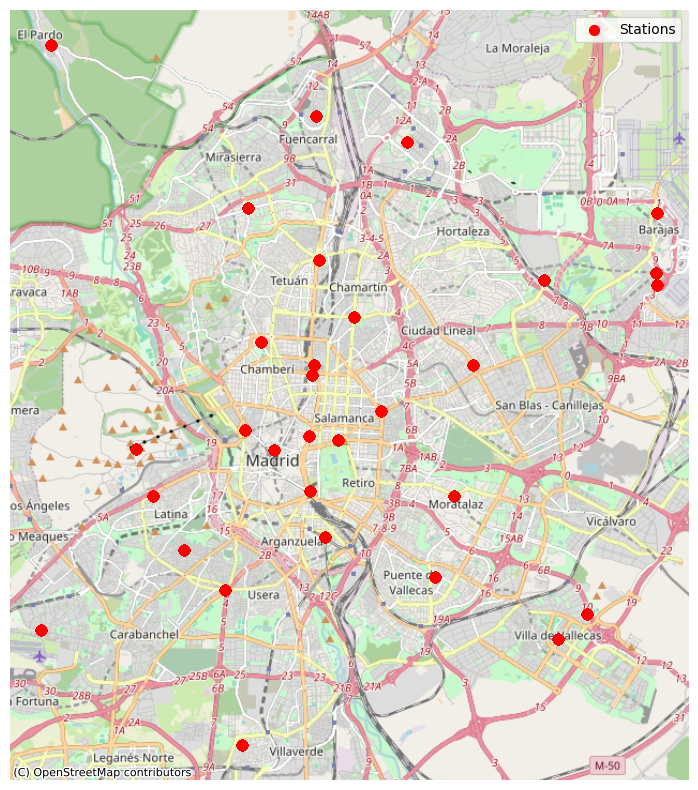

In [28]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# Suponiendo que df_onehot es tu DataFrame original
# Convertir el DataFrame a un GeoDataFrame
geometry = [Point(xy) for xy in zip(df_onehot['LONGITUD'], df_onehot['LATITUD'])]
gdf = gpd.GeoDataFrame(df_onehot, geometry=geometry)

# Definir el sistema de coordenadas (CRS) WGS84
gdf.set_crs(epsg=4326, inplace=True)

# Convertir a CRS compatible con contextily (Web Mercator)
gdf = gdf.to_crs(epsg=3857)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar los puntos en el mapa
gdf.plot(ax=ax, color='red', marker='o', markersize=50, label='Stations')

# Añadir el mapa base usando OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Ocultar los ejes
ax.set_axis_off()

# Mostrar leyenda
plt.legend()

# Mostrar el mapa
plt.show()
